Enter keywords/hastag to search about: Modi
Enter how many Tweets to analyse: 1000
How people are reacting onModiby analysing1000Tweets.
Positive


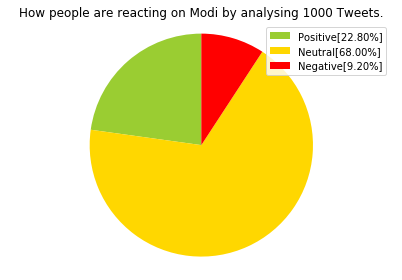

In [4]:
from textblob import TextBlob
import sys, tweepy
import matplotlib.pyplot as plt

def percentage(part, whole):
    return 100 * float(part)/float(whole)

consumerKey="wLYHIDGQPuR8z5c1xKYI8e41g"
consumerSecret="4q6gb4r3XcfY9vgQEXK4s3awtGe5BZLOCBVl0YZyTRYOguY39J"
accessToken="3971583192-kntJQl7Vu3ngJYFbODOmSyFY9XoDpW8g4Z20Vu1"
accessTokenSecret="7DZ72klAOuziyhY5LVswt33svwZeaXvqt51Mm75IDWaq9"

auth= tweepy.OAuthHandler(consumer_key=consumerKey, consumer_secret=consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api= tweepy.API(auth)

searchTerm= input("Enter keywords/hastag to search about: ")
noOfSearchTerms=int(input("Enter how many Tweets to analyse: "))

tweets = tweepy.Cursor(api.search, q=searchTerm).items(noOfSearchTerms)
positive= 0
negative= 0
neutral= 0
polarity= 0

for tweet in tweets:
    #print(tweet.text)
    analysis=TextBlob(tweet.text)
    polarity=analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity==0):
        neutral+=1
    elif(analysis.sentiment.polarity<0):
        negative+=1
    elif(analysis.sentiment.polarity>0):
        positive+=1
        
positive= percentage(positive, noOfSearchTerms)
negative= percentage(negative, noOfSearchTerms)
neutral= percentage(neutral, noOfSearchTerms) 

positive= format(positive, '.2f')
neutral= format(neutral, '.2f')
negative= format(negative, '.2f')

print("How people are reacting on" + searchTerm + "by analysing" + str(noOfSearchTerms) + "Tweets.")

if(polarity==0):
    print("Neutral")
elif(polarity<0):
    print("Negative")
elif(polarity>0):
    print("Positive")
    
labels=['Positive['+str(positive)+'%]', 'Neutral['+str(neutral)+'%]', 'Negative['+str(negative)+'%]'] 
sizes=[positive, neutral, negative] 
colors=['yellowgreen', 'gold', 'red']
patches, texts= plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('How people are reacting on '+searchTerm+' by analysing '+str(noOfSearchTerms)+' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()  